<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/DA0101EN_NotbookLink_Top"><img src = "https://ibm.box.com/shared/static/fvp89yz8uzmr5q6bs6wnguxbf8x91z35.png" width = 750, align = "center"></a>
 <h1 align=center><font size = 5> Link</font></h1> 

 <a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 300, align = "center"></a>

<h1 align=center><font size = 5>Data Analysis with Python</font></h1>

# Module 2 : Data Wrangling

### Welcome!

By the end of this notebook, you will have learned the basics of Data Wrangling! 

## Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref1">Identify and handle missing values</a>
<ul><div><a href="#ref2">- Identify missing values</a></div>
<div><a href="#ref3">- Deal with missing values</a></div>
<div><a href="#ref4">- Correct data format</a></div></ul></li>
<p></p>
<li><a href="#ref5">Data standardization</a></li>
<li><a href="#ref6">Data Normalization (centring/scaling)</a></li>
<li><a href="#ref7">Binning</a></li>
<li><a href="#ref8">Indicator variable</a></li>
<p></p>
Estimated Time Needed: <strong>30 min</strong>
</div>
 
<hr>

## What is the purpose of Data Wrangling?

Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.

### What is the fuel consumption (L/100k) rate for the diesel car?

### Import data

You can find the "Automobile Data Set" from the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data. We will be using this data set throughout this course.


#### Import pandas 

In [49]:
import pandas as pd

## Reading the data set from the URL and adding the related headers.

#### URL of dataset

In [50]:
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

 Python list "headers" containing name of headers 

In [51]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Use the Pandas method **read_csv()** to load the data from the web address. Set the parameter  "names" equal to the Python list "headers".

In [52]:
df = pd.read_csv(filename, names = headers)
print("Done")

Done


 Use the method **head()** to display the first five rows of the dataframe. 

In [53]:
# To see what the data set looks like, we'll use the head() method.
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis. 
<div>So, how do we identify all those missing values and deal with them?</div> 


**How to work with missing data:**

Steps for working with missing data:
1. Identify missing data
2. Deal with missing data
3. Correct data format

<a id="ref1"></a>
# 1. Identify and handle missing values


<a id="ref2"></a>
### Convert "?" to NaN
In the car dataset, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience. Here we use the function: 
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B

In [54]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [55]:
import numpy as np
df.replace("?",np.nan, inplace=True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


### Evaluating for Missing Data

The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:
1.  **.isnull()**
2.  **.notnull()**

The output is a boolean value indicating whether the dataframe is missing data.

In [56]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
missing_data = df.notnull()
missing_data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False


"True" stands for missing value, while "False" stands for not missing value.

### Count missing values in each column
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset.  In the body of the for loop the method  ".value_couts()"  counts the number of "True" values. 

In [58]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
True    205
Name: symboling, dtype: int64

normalized-losses
True     164
False     41
Name: normalized-losses, dtype: int64

make
True    205
Name: make, dtype: int64

fuel-type
True    205
Name: fuel-type, dtype: int64

aspiration
True    205
Name: aspiration, dtype: int64

num-of-doors
True     203
False      2
Name: num-of-doors, dtype: int64

body-style
True    205
Name: body-style, dtype: int64

drive-wheels
True    205
Name: drive-wheels, dtype: int64

engine-location
True    205
Name: engine-location, dtype: int64

wheel-base
True    205
Name: wheel-base, dtype: int64

length
True    205
Name: length, dtype: int64

width
True    205
Name: width, dtype: int64

height
True    205
Name: height, dtype: int64

curb-weight
True    205
Name: curb-weight, dtype: int64

engine-type
True    205
Name: engine-type, dtype: int64

num-of-cylinders
True    205
Name: num-of-cylinders, dtype: int64

engine-size
True    205
Name: engine-size, dtype: int64

fuel-system
True    205
Name:

Based on the summary above, each column has 205 rows of data, with seven columns containing missing data:

1. "normalized-losses": 41 missing data
2. "num-of-doors": 2 missing data
3. "bore": 4 missing data
4. "stroke" : 4 missing data
5. "horsepower": 2 missing data
6. "peak-rpm": 2 missing data
7. "price": 4 missing data

<a id="ref3"></a>
## Deal with missing data
**How to deal with missing data:**

    
    1. Drop data 
        a. drop the whole row
        b. drop the whole column
    2. Replace data
        a. replace it by mean
        b. replace it by frequency
        c. replace it based on other functions

Whole columns should be dropped only if most entries in the column are empty. 

In our dataset, none of the columns are empty enough to drop entirely.

We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

**Replace by mean:**

    "normalized-losses": 41 missing data, replace them with mean
    "stroke": 4 missing data, replace them with mean
    "bore": 4 missing data, replace them with mean
    "horsepower": 2 missing data, replace them with mean
    "peak-rpm": 2 missing data, replace them with mean
    
**Replace by frequency:**

    "num-of-doors": 2 missing data, replace them with "four". 
        * Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to 
    

**Drop the whole row:**

    "price": 4 missing data, simply delete the whole row
        * Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore they are not useful to us

#### Calculate the average of the column:

In [59]:
avg_1 = df["normalized-losses"].astype("float").mean(axis=0)
avg_1.mean()

122.0

#### Replace "NaN" by mean value in "normalized-losses" column:

In [60]:
df["normalized-losses"].replace(np.nan, avg_1, inplace = True)
df.head(5)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Calculate the mean value for 'bore' column:

In [61]:
avg_2=df['bore'].astype('float').mean(axis=0)
avg_2.mean()

3.3297512437810943

#### Replace NaN by mean value:

In [62]:
df['bore'].replace(np.nan, avg_2, inplace= True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>According to the example above, replace NaN in "stroke" column by mean:</b>
</div>

In [63]:
avg_3=df["Stroke"].astype("float").mean(axis=0)
avg_3.mean()
df["Stroke"].replace(np.nan, avg_3, inplace= True)
df.head()



KeyError: 'Stroke'

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #1 Answer: </h1>
<b>Run the code below! Did you get the right code?</b>
</div>

  <div align="right">
<a href="#q1" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q1" class="collapse">
```
# calculate the mean vaule for "stroke" column
avg_3 = df["stroke"].astype("float").mean(axis = 0)

# replace NaN by mean value in "stroke" column
df["stroke"].replace(np.nan, avg_3, inplace = True)
```
</div>



#### Calculate the mean value for the  'horsepower' column:

In [64]:
avg_4=df['horsepower'].astype('float').mean(axis=0)

#### Replace "NaN" by mean value :

In [65]:
df['horsepower'].replace(np.nan, avg_4, inplace= True)

#### Calculate the mean value for 'peak-rpm' column:

In [66]:
avg_5=df['peak-rpm'].astype('float').mean(axis=0)

#### Replace NaN by mean value:

In [67]:
df['peak-rpm'].replace(np.nan, avg_5, inplace= True)

To see which values are present in a particular column, we can use the ".value_counts()" method:

In [68]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [69]:
df['peak-rpm'].value_counts()

5500                 37
4800                 36
5000                 27
5200                 23
5400                 13
6000                  9
4500                  7
5800                  7
5250                  7
4150                  5
4200                  5
4350                  4
4750                  4
4400                  3
4250                  3
5100                  3
5900                  3
6600                  2
5125.369458128079     2
4650                  1
5750                  1
5600                  1
5300                  1
4900                  1
Name: peak-rpm, dtype: int64

We can see that four doors are the most common type. We can also use the ".idxmax()" method to automatically calculate the most common type:

In [70]:
df['num-of-doors'].value_counts().idxmax()

'four'

The replacement procedure is very similar to what we have seen previously:

In [71]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Finally, let's drop all rows that do not have price data:

In [72]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace = True)

# reset index, because we droped two rows
df.reset_index(drop = True, inplace = True)

In [73]:
df.dropna(subset=["price"], axis=0, inplace=True)

df.reset_index(drop=True,inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [74]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Good!** Now, we obtain the dataset with no missing values.

<a id="ref4"></a>
## Correct  data format
**We are almost there!**
<div>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</div>

In Pandas, we use 
<div>**.dtype()** to check the data type</div>
<div>**.astype()** to change the data type</div>

#### Let's list the data types for each column:

In [75]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int', however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.  

#### Convert data types to proper format:

In [76]:

df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
print("Done")

Done


#### Let us list the columns after the conversion:  

In [77]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

**Wonderful!**

Now, we finally obtain the cleaned dataset with no missing values and all data in its proper format.

<a id="ref5"></a>
# Data Standardization
Data is usually collected from different agencies with different formats.
(Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation.

**What is Standardization?**
<div>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
</div>

**Example**
<div>Transform mpg to L/100km:</div>
<div>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard</div>
<div>We will need to apply **data transformation** to transform mpg into L/100km</div>


The formula for unit conversion is
L/100km = 235 / mpg
<div>We can do many mathematical operations directly in Pandas.</div>

In [78]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [79]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b>According to the example above, transform mpg to L/100km in the column of "highway-mpg", and change the name of column to "highway-L/100km":</b>
</div>

In [80]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df['highway-L/100km'] = 235/df["city-L/100km"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,21.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,21.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,19.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,24.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,18.0


In [81]:
df["highway-mpg"] = 235/df["highway-mpg"]
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,21.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,21.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,19.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,24.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,18.0


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #2 Answer: </h1>
<b>Run the code below! Did you get the right code?</b>
</div>

 <div align="right">
<a href="#q2" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q2" class="collapse">
```
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

# check your transformed data 
df.head()
```
</div>



<a id="ref6"></a>
# Data Normalization 

**Why normalization?**
<div>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling the variable so the variable values range from 0 to 1.
 </div>

**Example**
<div>To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height" </div>
<div>**Target:** We would like to Normalize those variables so their value ranges from 0 to 1.</div>
<div>**Approach:** Replace origianl value by (original value)/(maximum value)</div>

In [82]:
# replace (origianl value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,21.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,21.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,19.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,24.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,18.0


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Questiont #3: </h1>

<b>According to the example above, normalize the column "height":</b>
</div>

In [83]:
df['height'] = df['height']/df['height'].max()

df.head(5)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,21.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,21.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,19.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,24.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,18.0


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3 Answer: </h1>
<b>Run the code below! Did you get the right code?</b>
</div>

<div align="right">
<a href="#q3" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q3" class="collapse">
```
df['height'] = df['height']/df['height'].max() 
# show the scaled columns
df[["length","width","height"]].head()

```
</div>


Here we can see we've normalized "length", "width", and "height" in the range of [0,1].

<a id="ref7"></a>
#  Binning
**Why binning?** 
<div>Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
 </div>

**Example: ** 
<div>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, and it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </div>

<div>We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins. <div>



## Example of Binning Data In Pandas

 Convert data to correct format: 

In [92]:
df["horsepower"]=df["horsepower"].astype(float, copy=True)
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476,21.0,Medium
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476,21.0,Medium


In [84]:
df["horsepower"]=df["horsepower"].astype(float, copy=True)
df.head(50)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.00,111.0,5000.0,21,8.703704,13495.0,11.190476,21.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.00,111.0,5000.0,21,8.703704,16500.0,11.190476,21.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.00,154.0,5000.0,19,9.038462,16500.0,12.368421,19.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.00,102.0,5500.0,24,7.833333,13950.0,9.791667,24.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.00,115.0,5500.0,18,10.681818,17450.0,13.055556,18.0
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.50,110.0,5500.0,19,9.400000,15250.0,12.368421,19.0
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,3.19,3.40,8.50,110.0,5500.0,19,9.400000,17710.0,12.368421,19.0
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,3.19,3.40,8.50,110.0,5500.0,19,9.400000,18920.0,12.368421,19.0
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,3.13,3.40,8.30,140.0,5500.0,17,11.750000,23875.0,13.823529,17.0
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,3.50,2.80,8.80,101.0,5800.0,23,8.103448,16430.0,10.217391,23.0


We would like four bins of equal size bandwidth. The fourth is because the function "cut"  includes the rightmost value: 

In [94]:
df["horsepower"]=df["horsepower"].astype(float, copy=True)
binwidth = (max(df["horsepower"])-min(df["horsepower"]))/4
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.00,111.0,5000.0,21,8.703704,13495.0,11.190476,21.0,Medium
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.00,111.0,5000.0,21,8.703704,16500.0,11.190476,21.0,Medium
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.00,154.0,5000.0,19,9.038462,16500.0,12.368421,19.0,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.00,102.0,5500.0,24,7.833333,13950.0,9.791667,24.0,Medium
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.00,115.0,5500.0,18,10.681818,17450.0,13.055556,18.0,Medium
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,3.40,8.50,110.0,5500.0,19,9.400000,15250.0,12.368421,19.0,Medium
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,3.40,8.50,110.0,5500.0,19,9.400000,17710.0,12.368421,19.0,Medium
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,3.40,8.50,110.0,5500.0,19,9.400000,18920.0,12.368421,19.0,Medium
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,3.40,8.30,140.0,5500.0,17,11.750000,23875.0,13.823529,17.0,Medium
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,2.80,8.80,101.0,5800.0,23,8.103448,16430.0,10.217391,23.0,Low


We build a bin array with a minimum value to a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins:

In [107]:
df["horsepower"]=df["horsepower"].astype(float, copy=True)
binwidth = (max(df["horsepower"])-min(df["horsepower"]))/4
bins = np.arange(min(df["horsepower"]), max(df["horsepower"]), binwidth)

 We set group  names:

In [120]:

df["horsepower"]=df["horsepower"].astype(float, copy=True)
binwidth = (max(df["horsepower"])-min(df["horsepower"]))/4
bins = np.arange(min(df["horsepower"]), max(df["horsepower"]), binwidth)
group_names = ['Low', 'Medium', 'High']

 We apply the function "cut" to determine what each value of "df['horsepower']" belongs to. 

In [121]:
df["horsepower"]=df["horsepower"].astype(float, copy=True)
binwidth = (max(df["horsepower"])-min(df["horsepower"]))/4
bins = np.arange(min(df["horsepower"]), max(df["horsepower"]), binwidth)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names,include_lowest=True  )
df[['horsepower','horsepower-binned']].head(2)

,horsepower,horsepower-binned
0,111.0,Medium
1,111.0,Medium


In [123]:
df["horsepower"]=df["horsepower"].astype(float, copy=True)
binwidth= (max(df["horsepower"])-(min(df["horsepower"]))/4
bins = np.arange(min(df["horsepower"]), max(df["horsepower"]), binwidth)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df["horsepower"],bins,labels= group_names,include_lowest=True)
df[["horsepower",'horsepower-binned']].head(2)        

SyntaxError: invalid syntax (<ipython-input-123-f699fdadeb45>, line 3)

Check the dataframe above carefully, you will find the last column provides the bins for "horsepower" with 3 categories ("Low","Medium" and "High"). 
<div>We successfully narrow the intervals from 57 to 3!</div>

## Bins visualization 
Normally, a histogram is used to visualize the distribution of bins we created above. 

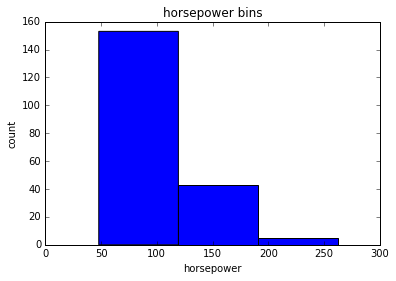

In [89]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

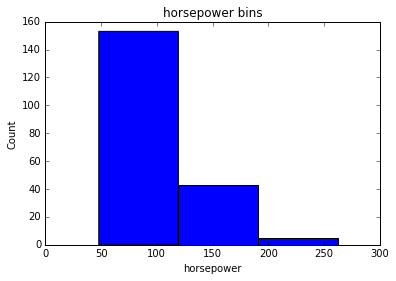

In [128]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a= (0,1,2)

plt.pyplot.hist (df["horsepower"], bins=3)
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("Count")
plt.pyplot.title("horsepower bins")

The plot above shows the binning result for attribute "horsepower". 

<a id="ref8"></a>
# Indicator variable (or dummy variable)
**What is an indicator variable?**
<div>An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. </div>

**Why do we use indicator variables?**
<div>So that we can use categorical variables for regression analysis in the later modules.</div>

**Example**
<div>We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.</div>

<div>We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type. <div>

In [2]:
df.columns

NameError: name 'df' is not defined

 Get indicator variables and assign it to data frame "dummy_variable_1": 

In [130]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [143]:
dummy_variable_2 = pd.get_dummies (df["aspiration"] )
dummy_variable_2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


Change column names for clarity: 

In [144]:
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [1]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
df.dummy_variable_1.head()

NameError: name 'pd' is not defined

We now have the value 0 to represent "gas" and 1 to represent "diesel" in the column "fuel-type". We will now insert this column back into our original dataset. 

In [146]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [3]:
df.head()

NameError: name 'df' is not defined

The last two columns are now the indicator variable representation of the fuel-type variable. It's all 0s and 1s now.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>As above, create indicator variable to the column of "aspiration": "std" to 0, while "turbo" to 1:</b>
</div>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #4 Answer: </h1>
<b>Run the code below! Did you get the right code?</b>
</div>

<div align="right">
<a href="#q4" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q4" class="collapse">
```
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()
```
</div>



 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>

<b>Merge the new dataframe to the original dataframe then drop the column 'aspiration':</b>
</div>

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #5 Answer: </h1>
<b>Run the code below! Did you get the right code?</b>
</div>

 <div align="right">
<a href="#q5" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q5" class="collapse">
```
#merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)
```
</div>









 save the new csv 

In [ ]:
df.to_csv('clean_df.csv')

# About the Authors:  

This notebook written by [Mahdi Noorian PhD](https://www.linkedin.com/in/mahdi-noorian-58219234/) ,[Joseph Santarcangelo PhD]( https://www.linkedin.com/in/joseph-s-50398b136/), Bahare Talayian, Eric Xiao, Steven Dong, Parizad , Hima Vsudevan and [Fiorella Wenver](https://www.linkedin.com/in/fiorellawever/).
Copyright &copy; 2017 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).

 <div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/DA0101EN_NotbookLink_bottom"><img src = "https://ibm.box.com/shared/static/cy2mwm7519t4z6dxefjpzgtbpi9p8l7h.png" width = 750, align = "center"></a>
 <h1 align=center><font size = 5> Link</font></h1> 